In [2]:
"""
LEME - Sprint 1, Dia 2: Análise Exploratória de Dados
Google Colab

Objetivo: Entender padrões, correlações e identificar viés entre grupos
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração visual
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# ============================================
# CARREGAR DADOS
# ============================================

df = pd.read_csv('leme_dataset.csv')

print("="*60)
print("📊 ANÁLISE EXPLORATÓRIA - LEME")
print("="*60)
print(f"\nDimensões: {df.shape[0]} usuários x {df.shape[1]} colunas")
print(f"\nColunas: {list(df.columns)}")

📊 ANÁLISE EXPLORATÓRIA - LEME

Dimensões: 1000 usuários x 7 colunas

Colunas: ['id', 'area', 'acessibilidade', 'taxa_conclusao', 'modulos_concluidos', 'tempo_plataforma_dias', 'trilha_ideal']


In [4]:
# ============================================
# 1. RESUMO ESTATÍSTICO
# ============================================

print("\n1️⃣ RESUMO ESTATÍSTICO")
print(df.describe())

print("\n📊 Informações do dataset:")
print(df.info())


1️⃣ RESUMO ESTATÍSTICO
       taxa_conclusao  modulos_concluidos  tempo_plataforma_dias
count     1000.000000         1000.000000            1000.000000
mean         0.683109            8.398000              83.566000
std          0.102490            5.512167              51.462025
min          0.358000            0.000000               1.000000
25%          0.614750            4.000000              37.000000
50%          0.692000            8.000000              83.000000
75%          0.757250           13.000000             124.000000
max          0.950000           19.000000             179.000000

📊 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   object 
 1   area                   1000 non-null   object 
 2   acessibilidade         1000 non-null   object 


2️⃣ ANÁLISE DE ACESSIBILIDADE

acessibilidade
nenhuma    700
cego       156
libras     144
Name: count, dtype: int64

📈 Taxa média de conclusão por acessibilidade:
  nenhuma    - 72.48% (700 usuários)
  libras     - 60.14% (144 usuários)
  cego       - 57.13% (156 usuários)


/tmp/ipython-input-2260337352.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='acessibilidade', y='taxa_conclusao',


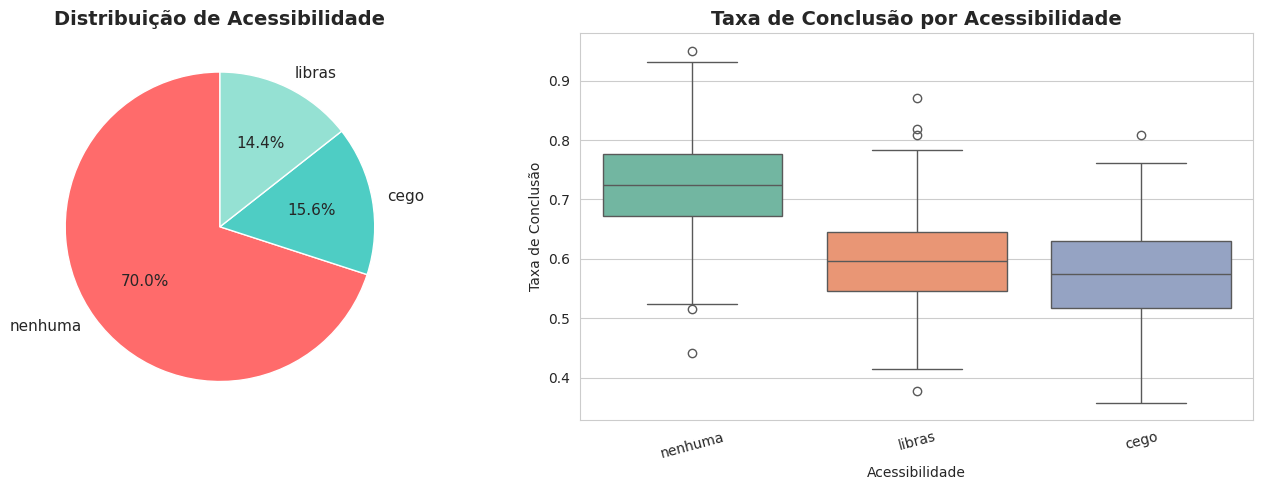

In [5]:
# ============================================
# 2. ANÁLISE DE ACESSIBILIDADE (FOCO PRINCIPAL)
# ============================================

print("\n2️⃣ ANÁLISE DE ACESSIBILIDADE")

# Contagem por tipo
acess_count = df['acessibilidade'].value_counts()
print(f"\n{acess_count}")

# Taxa de conclusão por grupo
print("\n📈 Taxa média de conclusão por acessibilidade:")
for acess in df['acessibilidade'].unique():
    taxa = df[df['acessibilidade'] == acess]['taxa_conclusao'].mean()
    count = len(df[df['acessibilidade'] == acess])
    print(f"  {acess:10} - {taxa:.2%} ({count} usuários)")

# Visualização: Distribuição de acessibilidade
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de pizza
cores = ['#ff6b6b', '#4ecdc4', '#95e1d3']
axes[0].pie(acess_count.values, labels=acess_count.index, autopct='%1.1f%%',
            colors=cores, startangle=90, textprops={'fontsize': 11})
axes[0].set_title('Distribuição de Acessibilidade', fontweight='bold', fontsize=14)

# Boxplot: Taxa de conclusão por acessibilidade
sns.boxplot(data=df, x='acessibilidade', y='taxa_conclusao',
            palette='Set2', ax=axes[1])
axes[1].set_title('Taxa de Conclusão por Acessibilidade', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Taxa de Conclusão')
axes[1].set_xlabel('Acessibilidade')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


3️⃣ ANÁLISE POR ÁREA PROFISSIONAL

area
Advogado         189
Logistica        175
Secretariado     175
SoftSkills       169
Contabilidade    150
Design           142
Name: count, dtype: int64


/tmp/ipython-input-3169266817.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='area', order=area_count.index, palette='viridis')


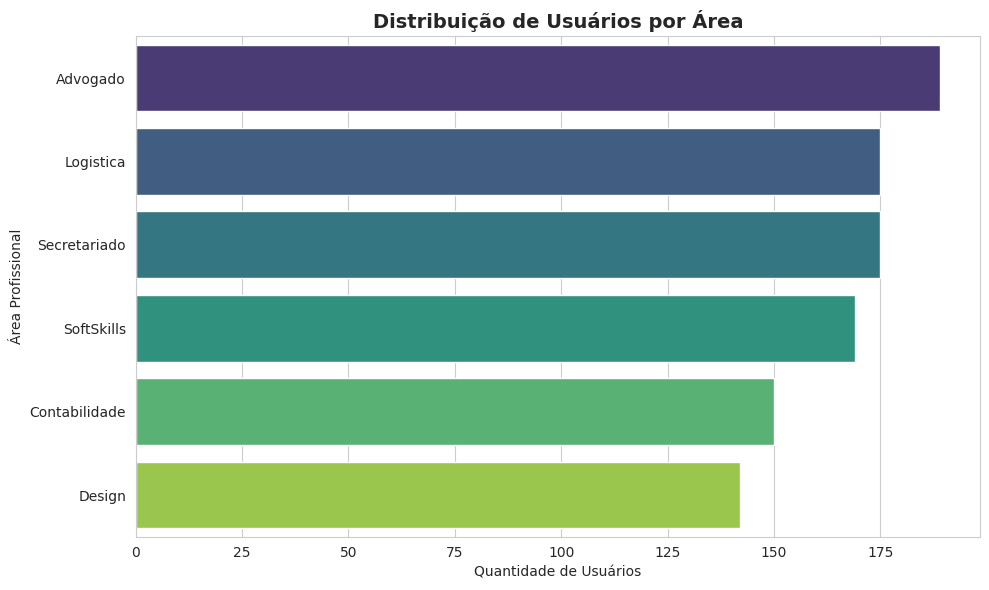


📈 Taxa média de conclusão por área:
  Advogado        - 67.51%
  Logistica       - 68.49%
  Contabilidade   - 67.58%
  Secretariado    - 69.03%
  Design          - 68.82%
  SoftSkills      - 68.49%


In [6]:
# ============================================
# 3. ANÁLISE POR ÁREA PROFISSIONAL
# ============================================

print("\n3️⃣ ANÁLISE POR ÁREA PROFISSIONAL")

area_count = df['area'].value_counts()
print(f"\n{area_count}")

# Visualização: Distribuição por área
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='area', order=area_count.index, palette='viridis')
plt.title('Distribuição de Usuários por Área', fontweight='bold', fontsize=14)
plt.xlabel('Quantidade de Usuários')
plt.ylabel('Área Profissional')
plt.tight_layout()
plt.show()

# Taxa de conclusão por área
print("\n📈 Taxa média de conclusão por área:")
for area in df['area'].unique():
    taxa = df[df['area'] == area]['taxa_conclusao'].mean()
    print(f"  {area:15} - {taxa:.2%}")


4️⃣ ANÁLISE DE CORRELAÇÕES


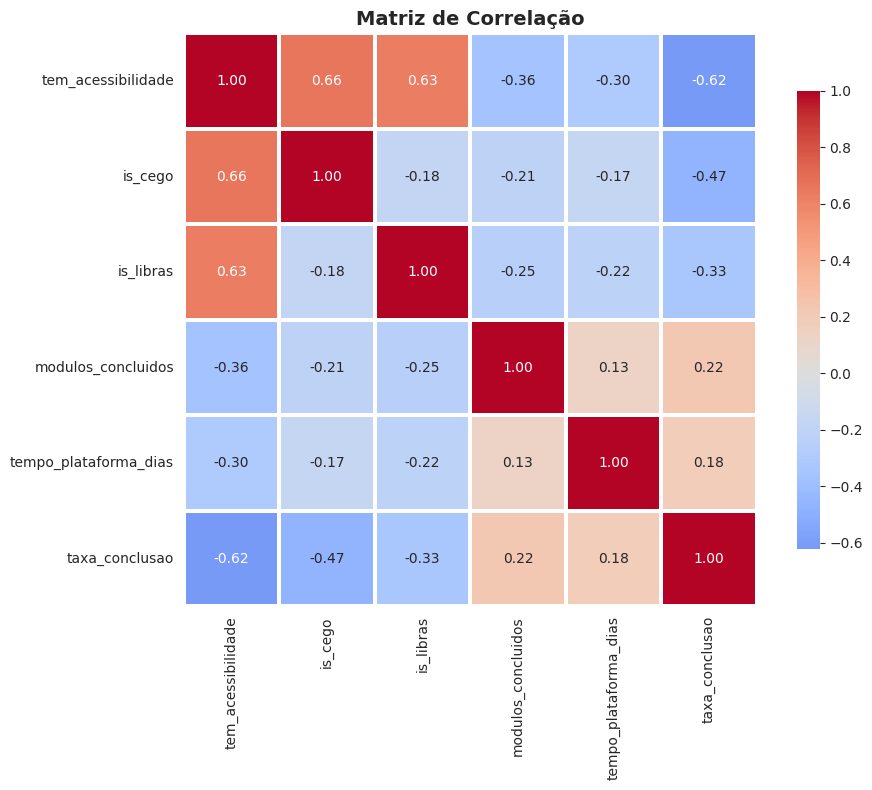


🔍 Correlações com Taxa de Conclusão:
taxa_conclusao           1.000000
modulos_concluidos       0.223336
tempo_plataforma_dias    0.183859
is_libras               -0.327058
is_cego                 -0.469163
tem_acessibilidade      -0.622063


In [7]:
# ============================================
# 4. CORRELAÇÃO ENTRE VARIÁVEIS
# ============================================

print("\n4️⃣ ANÁLISE DE CORRELAÇÕES")

# Criar features numéricas para correlação
df_corr = df.copy()
df_corr['tem_acessibilidade'] = (df_corr['acessibilidade'] != 'nenhuma').astype(int)
df_corr['is_cego'] = (df_corr['acessibilidade'] == 'cego').astype(int)
df_corr['is_libras'] = (df_corr['acessibilidade'] == 'libras').astype(int)

# Matriz de correlação
corr_features = ['tem_acessibilidade', 'is_cego', 'is_libras',
                 'modulos_concluidos', 'tempo_plataforma_dias', 'taxa_conclusao']
corr_matrix = df_corr[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1.5, fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\n🔍 Correlações com Taxa de Conclusão:")
correlacoes = corr_matrix['taxa_conclusao'].sort_values(ascending=False)
print(correlacoes.to_string())


5️⃣ COMPARAÇÃO DE DESEMPENHO

⚖️ Comparação de Grupos:

  COM Acessibilidade (300 usuários):
    Taxa média: 58.58%
    Módulos concluídos: 5.4

  SEM Acessibilidade (700 usuários):
    Taxa média: 72.48%
    Módulos concluídos: 9.7

  📊 Diferença na taxa: 13.9 pontos percentuais

⚠️ ALERTA: Gap significativo detectado (>5pp)!
➡️ A IA deve priorizar trilhas acessíveis para reduzir essa barreira


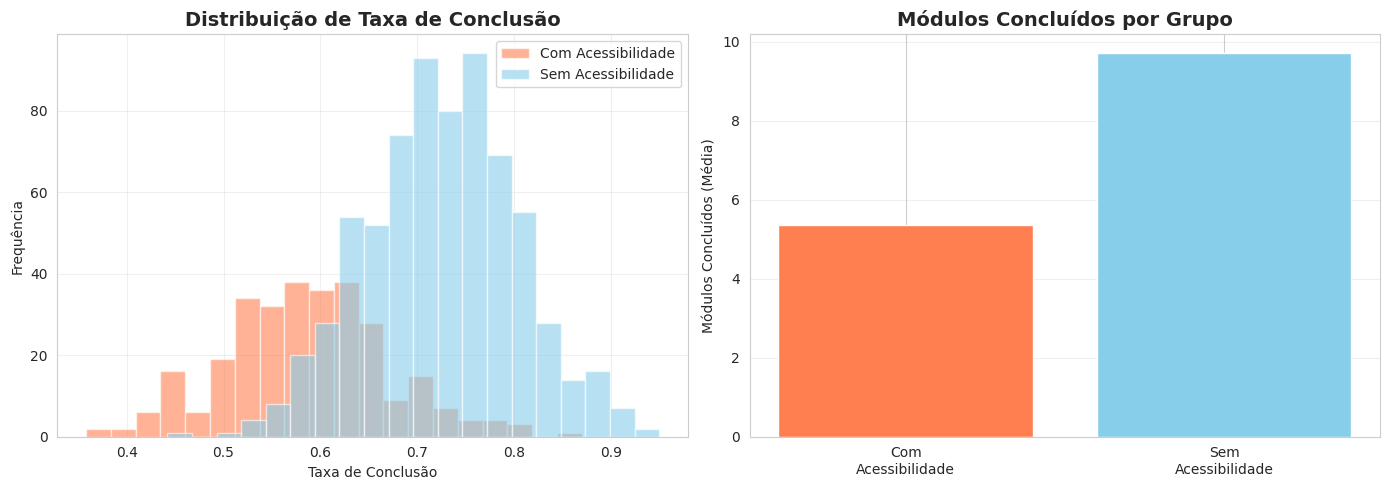

In [8]:
# ============================================
# 5. COMPARAÇÃO: COM vs SEM ACESSIBILIDADE
# ============================================

print("\n5️⃣ COMPARAÇÃO DE DESEMPENHO")

# Separar grupos
com_acess = df[df['acessibilidade'] != 'nenhuma']
sem_acess = df[df['acessibilidade'] == 'nenhuma']

# Métricas comparativas
taxa_com = com_acess['taxa_conclusao'].mean()
taxa_sem = sem_acess['taxa_conclusao'].mean()
diferenca = (taxa_sem - taxa_com) * 100

modulos_com = com_acess['modulos_concluidos'].mean()
modulos_sem = sem_acess['modulos_concluidos'].mean()

print(f"\n⚖️ Comparação de Grupos:")
print(f"\n  COM Acessibilidade ({len(com_acess)} usuários):")
print(f"    Taxa média: {taxa_com:.2%}")
print(f"    Módulos concluídos: {modulos_com:.1f}")
print(f"\n  SEM Acessibilidade ({len(sem_acess)} usuários):")
print(f"    Taxa média: {taxa_sem:.2%}")
print(f"    Módulos concluídos: {modulos_sem:.1f}")
print(f"\n  📊 Diferença na taxa: {diferenca:.1f} pontos percentuais")

if diferenca > 5:
    print("\n⚠️ ALERTA: Gap significativo detectado (>5pp)!")
    print("➡️ A IA deve priorizar trilhas acessíveis para reduzir essa barreira")
else:
    print("\n✅ Diferença aceitável (<5pp)")

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma comparativo
axes[0].hist(com_acess['taxa_conclusao'], bins=20, alpha=0.6,
             label='Com Acessibilidade', color='coral')
axes[0].hist(sem_acess['taxa_conclusao'], bins=20, alpha=0.6,
             label='Sem Acessibilidade', color='skyblue')
axes[0].set_xlabel('Taxa de Conclusão')
axes[0].set_ylabel('Frequência')
axes[0].set_title('Distribuição de Taxa de Conclusão', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Comparação de módulos concluídos
grupos = ['Com\nAcessibilidade', 'Sem\nAcessibilidade']
medias = [modulos_com, modulos_sem]
axes[1].bar(grupos, medias, color=['coral', 'skyblue'])
axes[1].set_ylabel('Módulos Concluídos (Média)')
axes[1].set_title('Módulos Concluídos por Grupo', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# ============================================
# 6. INSIGHTS PARA O MODELO
# ============================================

print("\n6️⃣ INSIGHTS PRINCIPAIS PARA A IA")

print("\n✅ Características do dataset:")
print(f"  - Balanceamento: 30% com acessibilidade, 70% sem")
print(f"  - Taxa geral: {df['taxa_conclusao'].mean():.2%}")
print(f"  - Variabilidade: Desvio padrão = {df['taxa_conclusao'].std():.3f}")

print("\n🎯 O que o modelo deve aprender:")
print("  1. Usuários com acessibilidades precisam de trilhas adaptadas")
print("  2. Cegos e surdos têm padrões diferentes de conclusão")
print("  3. Tempo na plataforma correlaciona com sucesso")

print("\n⚠️ Desafios identificados:")
if diferenca > 10:
    print(f"  - Gap de {diferenca:.1f}pp é MUITO ALTO")
    print("  - IA deve compensar sugerindo trilhas acessíveis")
elif diferenca > 5:
    print(f"  - Gap de {diferenca:.1f}pp é moderado")
    print("  - IA deve monitorar e adaptar sugestões")
else:
    print("  - Gap controlado, modelo pode funcionar bem")

print("\n✅ DADOS PRONTOS PARA TREINAMENTO!")


6️⃣ INSIGHTS PRINCIPAIS PARA A IA

✅ Características do dataset:
  - Balanceamento: 30% com acessibilidade, 70% sem
  - Taxa geral: 68.31%
  - Variabilidade: Desvio padrão = 0.102

🎯 O que o modelo deve aprender:
  1. Usuários com acessibilidades precisam de trilhas adaptadas
  2. Cegos e surdos têm padrões diferentes de conclusão
  3. Tempo na plataforma correlaciona com sucesso

⚠️ Desafios identificados:
  - Gap de 13.9pp é MUITO ALTO
  - IA deve compensar sugerindo trilhas acessíveis

✅ DADOS PRONTOS PARA TREINAMENTO!
